# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [109,325,75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   1406  16729    28986     673               836             3
1  32717  16784    13626   60869              1272          5609
2  20398   1137        3    4407                 3           975

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Frozen: 3071.9
* Grocery: 7951.2
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


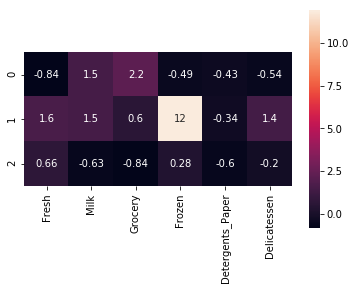

In [5]:
#### This is a simple piece of code to compute Z-score for each sample data
#### point.
#### Z-score gives how much a given value deviates from the mean value (zero)

import seaborn as sns

z_scores = (samples-data.mean())/data.std(ddof=0)

display(sns.heatmap(z_scores,annot=True,square=True))

**Answer:**

The above z-scores presents the spending of each of the sample data point comapred to the overall distribution. z-score gives how much standard deviation away the given value is from the value. A Negative value indicates a value below the mean value and a positive value indicates a value above the mean value.

The first customer spends hugely on Grocery and milk. This is evident from the z-score values of `1.5 and 2.2` for `Milk and Grocery` respectively. It might be a Grocery store.

The second customer purchase large volumes in each category,especially on Fresh, Milk, Grocery, Frozen and Delicatessen (`z-score values of 1.6, 1.5, 0.6, 12, 1.4 respectively`). So it might represent a Wholesale retailer.

The third customer mainly spends on Fresh and Frozen products (`z-score 0.66, 0.28 respectively`), so it might represent a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'],axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state=23)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=12)
regressor.fit(X_train,y_train)
# TODO: Report the score of the prediction using the testing set
score = score = regressor.score(X_test,y_test)
print(score)

0.0547529185963


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
            
- Predicted feature : *Delicatessen*

- Reported prediction score: 0.055

- The prediction score is very low (close to zero). That means other features are not doing well in predicting the annual spending on *Delicatessen*. So this feature must be necessary for identifying customers spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

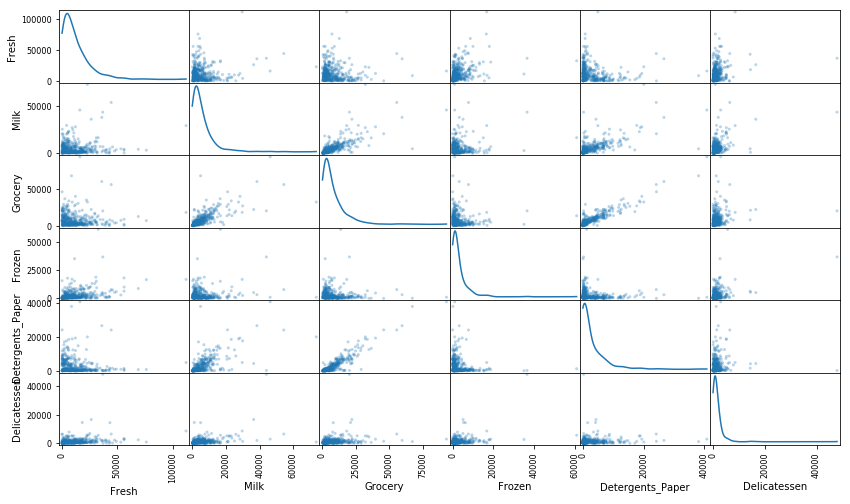

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

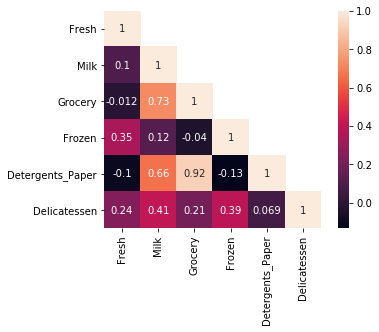

In [11]:
#### code for visualising correlations using heatmap(with values)
### value close to 1 means strong correlation.

corr_data = data.corr()

mat = np.zeros_like(corr_data)
mat[np.triu_indices_from(mat,1)] = True
display(sns.heatmap(corr_data, mask=mat, square=True, annot=True))

**Answer:**


- The distribution for all of  the features of the dataset is positively skewed, with a long and thin tail. Long and thin tail means that a data point having large value occurs with very low probability. That data point may or may not be an outlier it depends on where that data point lies in the distribution of other product categories.

 Most of the features are uncorrelated. Most of the datapoints for the plot between uncorrelated features lie near 0. The reason is that the feature values are not scaled, they lie in different ranges. That's why the data points are clouded near the origin.

 

- Yes there are features which exhibit correlation:
                        
                       (Detergents_Paper,Milk),(Detergents_Paper,Grocery),(Grocery,Milk)
  
  The correlation coefficient for these pairs are 0.66, 0.92, 0.73 showing strong correlation.
  
  The corrrelation can be seen from the plots between these features. The plot between these correlated features is linear and increasing, which indicates that the pair of features stated above are positively correlated.                 
                        
- The plot confirms the relevance of the feature --- *Delicatessen*. The feature does not show any  strong correlation with any of the other features. So, it must be relevant in predicting the spending habits of customers.

 Correlation coefficient values in order are as follows: 0.24, 0.41, 0.21, 0.39, 0.069.

- I would say the data distribution is positively skewed, with a long tail.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

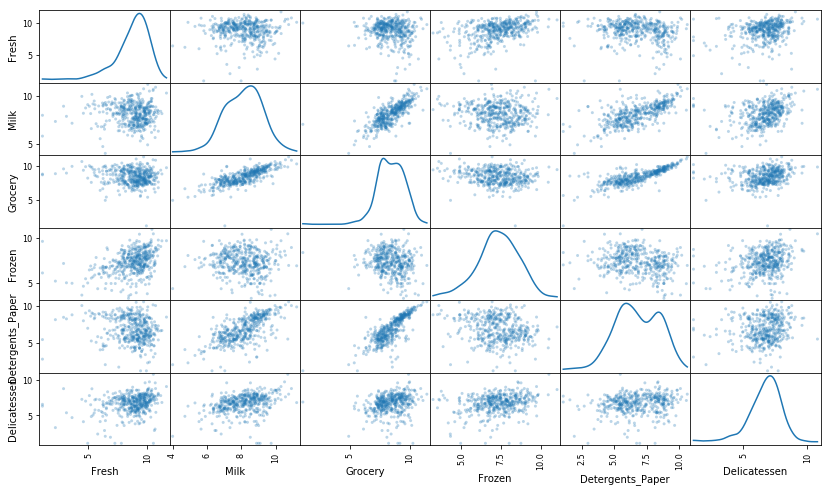

In [25]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [26]:
### This is a suggestion given on first review of the project.
### Need to havae variance of each feature set to 1 so that no feature dominates
### in PCA
### StandardScaler from sklearn transform the data such that it has zero mean
### and unit variance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(log_data)
log_data=pd.DataFrame(scaler.transform(log_data),columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
log_samples= pd.DataFrame(scaler.transform(log_samples),columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])

In [27]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -1.002470  1.484861  1.644448 -0.615434         -0.033357     -4.251391
1  1.126298  1.487900  0.967408  2.895443          0.210797      1.502278
2  0.806722 -1.004409 -6.585828  0.849171         -3.308406      0.165965

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [28]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154,338,429,142,183,184]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
65  -2.900383  1.693561  2.055320 -2.897620          1.925128      0.454725
66  -4.419217 -0.727143  0.421885 -1.665220          0.794247     -2.573276
81  -2.260213  0.964880  1.017150 -1.290605          1.267092     -1.233656
95  -5.162332 -0.131195  0.268622 -0.946645         -0.802065     -0.077350
96  -3.784560 -0.232976  0.502887 -1.811783          0.858648     -0.981590
128 -2.562859  0.895060 -0.172551 -1.828078          0.105835     -4.251391
171 -2.321600  1.888173  1.303321 -0.641337          1.334135      1.584922
193 -2.392867  0.032567  1.324612 -0.339421          1.074864     -0.125134
218 -3.950364  0.742633  1.065753 -0.111358          0.982962      1.599687
304 -2.468323  0.737188  1.503576 -0.683143          1.505728      0.857110
305 -2.189873  1.247023  0.580526 -0.481681          0.863880     -1.003004
338 -5.162332 -2.141309  0.372671  1.834411         -2.372177     -0.271293
353 -2.684254  0.575416  1.364002 -1.459029          1.328069      0.265693
355 -2.356295 -1.418452 -0.748302 -1.402982         -0.913891     -1.390735
357 -3.462978 -0.898355  1.408120 -1.856015          1.181388     -1.500490
412 -2.811056  0.063909  0.882842 -2.117116          0.704073     -1.938378

Data points considered outliers for the feature 'Milk':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
86   0.885721  2.855165  1.736366 -0.316992          1.815529      0.107374
98  -1.697763 -3.150111 -1.600536 -0.393251         -1.605886     -1.361243
154 -1.554127 -3.808515 -3.158292 -2.325583         -2.815523     -3.502289
356  0.878632 -2.984076 -2.741651  0.589193         -2.669330     -0.274075

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   0.806722 -1.004409 -6.585828  0.849171         -3.308406      0.165965
154 -1.554127 -3.808515 -3.158292 -2.325583         -2.815523     -3.502289

Data points considered outliers for the feature 'Frozen':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
38  -0.202038  1.427797  1.150355 -2.965435          1.199134     -0.453965
57  -0.090130  1.002254  0.732551 -2.855481          1.248494      0.375031
65  -2.900383  1.693561  2.055320 -2.897620          1.925128      0.454725
145  0.859060  0.845295  1.808206 -2.777479          1.544309      1.322056
175 -0.657037  0.783776  0.843964 -2.611025          0.905095      0.589216
264 -1.185298  0.978272  1.079800 -2.486613          1.111189      0.364836
325  1.126298  1.487900  0.967408  2.895443          0.210797      1.502278
420 -0.222227  0.414743  0.940752 -3.181814          1.187478      0.438451
429  0.223072 -0.605179 -0.231456 -2.689816         -1.370022      0.885417
439 -0.539657 -0.633106 -0.549941 -2.437112         -0.359763     -2.072714

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   0.806722 -1.004409 -6.585828  0.849171         -3.308406      0.165965
161  0.471896 -1.693748 -2.507593 -0.238200         -3.308406      0.798851

Data points considered outliers for the feature 'Delicatessen':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
66  -4.419217 -0.727143  0.421885 -1.665220          0.794247     -2.573276
109 -1.002470  1.484861  1.644448 -0.615434         -0.033357     -4.251391
128 -2.562859  0.895060 -0.172551 -1.828078          0.105835     -4.251391
137 -0.470505  0.811102  0.520827 -0.629456         -0.119445     -2.353561
142  1.210170  0.698153  0.517680  0.548137         -2.204828     -4.251391
154 -1.554127 -3.808515 -3.158292 -2.325583         -2.815523     -3.502289
183  1.206710  2.379109  1.319203  2.497587         -0.761757      3.140996
184 -1.989047 -1.202487  0.014597 -2.336044         -0.567071     -3.259072
187 -0.630153  0.802121  0.673517  1.123840          0.792736     -4.251391
203 -1.597927 -1.473545 -0.661681 -0.896899          0.043449     -2.882947
233 -1.257757  0.363789 -0.300165 -0.357509         -0.449231     -3.604273
285  1.266528 -1.536454 -0.226459 -0.274729         -0.412044     -2.882947
289  1.307790 -2.282172 -2.050682 -0.051265         -1.931422     -2.729686
343 -0.878424  0.673491  1.557772 -0.013988          1.664058     -2.332635

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Yes, there are some data points which are considered as outliers for more than one features. There indexes are:

                            65, 66, 128, 154, 75
        
 Among these data points, the data point *154* is considered as outlier for 3 features, and other data points are considered as outliers for two features.
 
The data point *154* can be removed as an outlier, because:
    
                                    - It is considered as an outlier for 3 features, namely Milk,Grocery, Delicatessen
                                    - For the datapoint, values for the other two features Frozen, Detergents_Paper is very close to the lower bound (Q1-step).
                                    - For the datapoint, values for the pair of features (Detergents_Paper, Milk) and (Detergents_Paper, Grocery) doesn't seem to be positively correlated(positive correlation between these pair features was established in the previous exercise).
                                    
 So, the point 154 can be removed from the dataset.
 
 Other data points mentioned above are not considered as outliers because the value for the features (other than the features that consider them an outlier) is close to the mean value of that feature and they follow the the correlation established in a previous exercise
 
 Points added to *outliers* list to be removed : 154,338,429,142,183,184
 
 Apart from point *154* other points are added to the list because 
                            
                            - the datapoints in the list are considered outliers by any one of the features of the dataset.
                            - these datapoints does not follow the positive correlation found between the features (Detergents_Paper,Milk),(Detergents_Paper,Grocery),(Grocery,Milk).
                            - the value for one or two features lies very  close to the boundary value , that is close to either Q1-step or Q3+step

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

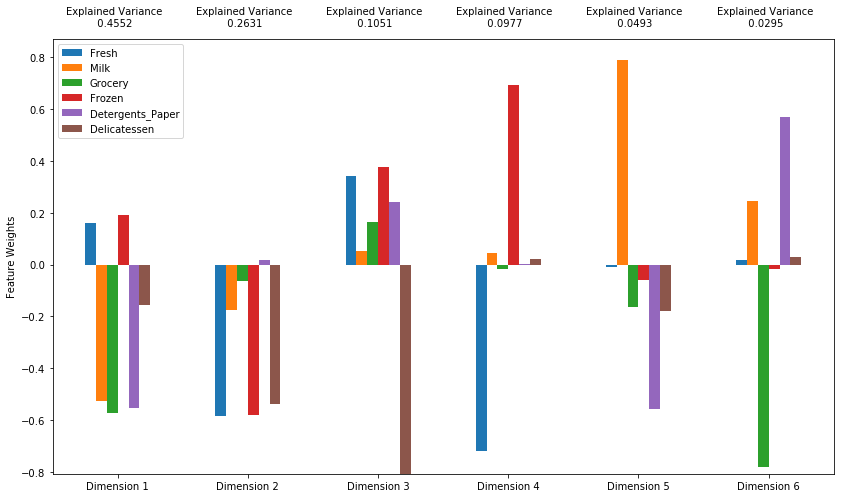

In [29]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6,random_state=98).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**


|                | First and Second principal component | First Four principal components | 
| :------------: | :------------------------:           | :---------------------------:   | 
| Variance **in total** |        0.7183                        |          0.9211                  |


- The first dimension positively correlates ` Milk, Grocery and Detergents_Paper` together. So this dimension represent spending on these products together. If spending on any one of these product category decreases it results in the decrease in spending on other two product categories. Explained variance of first dimension is 0.4552.

- The second dimension shows high positive correlation between product categories : `Fresh, Frozen, Delicatessen`. So it  controls the spending on these items together. This might represent spending by a restaurant. Cumulative variance of first two dimensions 0.7183.

- The third dimensions,  positively correlates product categories `Fresh, Frozen and Detergents_Paper`. But more than this,product categories `Fresh, Frozen, Detergents_Paper` strongly negatively correlates with `Delicatessen`. It represents customers who either highly spend on either one`Delicatessens` or on  `Fresh, Frozen and Detergents_Paper` products. Cumulative variance of first three dimensions is 0.8234.

- In the fourth dimension spending on `Fresh` products is highly negatively correlated with spending on `Frozen` products. So it represents set of customers who are highly spending either on `Fresh` products or on `Frozen` products. If they are spending on `Fresh` products they are not spending on `Frozen` items and vice versa. Cumulative variance of first four dimensions is 0.9211

- Fifth dimension shows strong negative correlation between `Milk and Detergents_Paper`, So it represents customers who are buying `Milk` products but not `Detergents_Paper` and if they are spending on `Detergents_Paper` they are not spending on `Milk` products. Cumulative correlation of first five dimensions is 0.9704.

- Sixth dimension, indicates negative correlation between  `Grocery` and `Milk, Detergents_Paper`. It represents customers who highly spends either on `Grocery` or on `Milk, Detergents_Paper`. Cumulative correlation of all six dimension is 0.9999


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [30]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.2975       2.8840       3.1987       0.2542       1.7459   
1      -0.9405      -3.4393       0.5531       1.2814       0.4519   
2       6.4276      -0.5001      -1.4569       0.0805       2.0442   

   Dimension 6  
0      -1.0776  
1      -0.2779  
2       3.0049

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [31]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state=98).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [32]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.2975       2.8840
1      -0.9405      -3.4393
2       6.4276      -0.5001

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

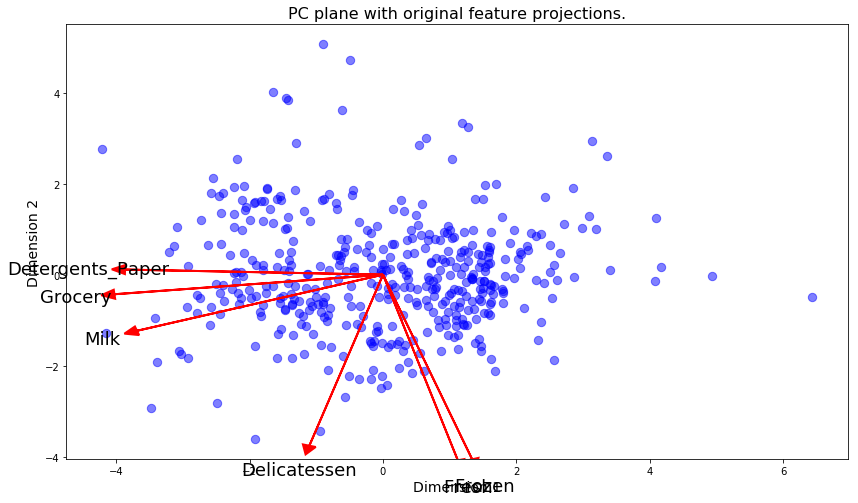

In [33]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

- Advantages to using K-Means clustering:
                
                - K-Means clustering algorithm is very fast comapred to other algorithms.
                - Works very well for spherical clusters.
                - Results can be interpreted easily.
                
- Advantages of using Gaussian Mixture Model clustering:

                - It is flexible. It can detect clusters of any shape and sizes.
                - Soft clustering. It assign probabilities to a data point representing the degree of memebership of that point in a particular cluster. Very good if there is no clear seperation between clusters.
                
                
- In my opininon Gaussian Mixture model algorithm for clustering should be used because:
                
                - There is no clear seperation among the data points. In such a case if we assign a data point to a particular cluster (using hard clustering) then we are loosing some information. The goal of the project is to describe the variation in the different types of customers. Soft clustering can bring more information about the various type customers. For example, a data point which belongs to two clusters with equal probability might represent a customer who is expanding business or transforming the business or even a new kind of business. Information like this can be captured by using Gaussian Mixture Model.
                
                - Gaussian Mixture Model assumes that the data points are generated from mixture of Gaussian distributions. The distribution of data points for all of the features was found to be normal after scaling and log transformation. So this assumption holds true.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2,random_state=98).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print(score)

0.405694864456


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**




| Number of Clusters | Silhouette Score |
| :--------: | :-------: |
|         2        |   0.4057       |
|         3        |   0.3946       |
|         4        |   0.3196       |
|         5        |   0.2161       |
|         6        |   0.2862       |
|         7        |   0.3370       |
|         8        |   0.32940       |

- Best Silhouette Score : 0.4057 for Two clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

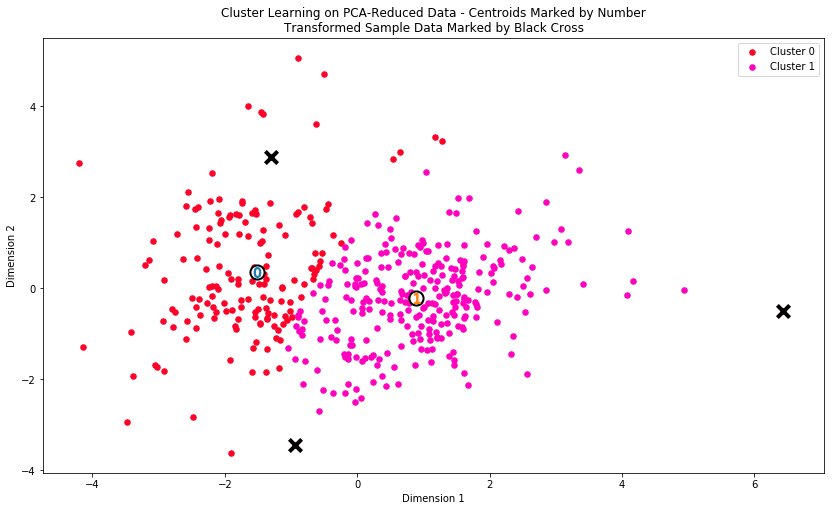

In [46]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [47]:
# TODO: Inverse transform the centers
scaled_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
log_centers = scaler.inverse_transform(scaled_centers)
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3255.0  7562.0  12027.0   792.0            3941.0         857.0
Segment 1  9303.0  2137.0   2669.0  2161.0             395.0         771.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

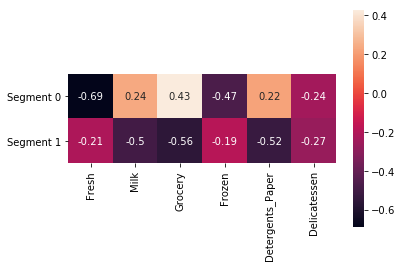

In [51]:
### Code for calculating the z-scores for the two cluster centers 
### to compare with rest of the data.

scrs = (true_centers-data.mean())/data.std()

display(sns.heatmap(scrs,annot=True,square=True))

**Answer:**

- **Segment 0** : This center for *Cluster 0* represents a customer which spends heavily on products belonging to categories `Milk, Grocery, Detergents_Paper` (z-scores 0.24, 0.43, 0.22 respectively). Also, this cutomer spends very little on `Fresh`(z-score of -0.69) Products and close to median expenditure on `Delicatessen`(z-score -0.24). So, this customer might be a large Grocery store or a retailer.

- **Segment 1** : This is the center for *Cluster 1* and represents a customer which spends mostly on `Fresh and Frozen` products as comapre to other categories as evident from the z-score values:

            Fresh             : -0.21
            Milk              : -0.5
            Grocery           : -0.56
            Frozen            : -0.19
            Detergents_Paper  : -0.52
            Delicatessen      : -0.27

 
 
 This type of customer spends less than mean spending for each category. Among them most spending is done on `Fresh and Frozen` products. Because the spending is less (negative z-scores) it might represent a small business. So, this might represent a customer like a restaurant or a cafe.
             

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [52]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


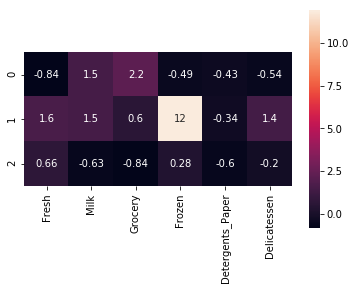

In [53]:
### For reference the z-scores are again calculated for sample points

z_scores = (samples-data.mean())/data.std(ddof=0)

display(sns.heatmap(z_scores,annot=True,square=True))

**Answer:**

- ** Sample point 0**: Predicted to be in *Cluster 0*.
    
    `Sample point 0` represents a customer that spends highly on `Grocery and Milk` products. As described in the earlier exercise(Question8) that `Segment 0` represents a  customer which spends highly on `Milk,Grocery and Detergents_Paper`. So, `Segment 0` best represents this point and this is consistent with the prediction.
    
    
- **Sample point 1**: Predicted to be in *Cluster 0*.

    `Sample point 1` represents a customer that spends highly on each of the product categories except `Detergents_Paper` for which the spending is around the mean spending for this category. `Segment 0` represents a  customer which spends highly on `Milk,Grocery and Detergents_Paper` and `Segment 1` represents a customer with most spendings on `Fresh and Frozen` products. 
    `Sample point 1` belongs to a cluster that represents high spendings on each product category that is niether represented by `Segment 0` nor by `Segment 1`. 
    If we look at the clustering results this point lies on the boundary of two clusters. Because it kind of represents both clsuters. It may represent a region where two clusters overlap.
    As Gaussian Mixture Model(GMM) clustering is used, just predictions should not be used to conclude about the kind of customers, probabilities assigned by GMM clustering to each point that represent the degree of belonging to a cluster should also be used to conclude about the kind of customer.
    `Sample point 1` lies in a region of overlap, so it can belong to any cluster. But because it rpresents high spendings and `Segment 0` represents a customer with high spendings so it can be put into *Cluster 0*
    
- **Sample point 3**: Predicted to be in *Cluster 1*.

    `Sample point 3` represents a customer that spends mostly on `Fresh and Frozen` products but the overall spending is low (low z-score values). As described in the earlier exercise(Question8) that `Segment 1` represents a  customer which spends mostly on `Fresh and Frozen` with low spending on each product categories. So, `Segment 1` best represents this point and this is consistent with the prediction.
  

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B testing can be used to determine whether the change in delivery system will affect the customer positively or negatively. A/B testing should be conducted on the customer segments seperately.

A cluster(segment) is homogenous, meaning that all the individuals with in a cluster are alike in terms of their needs. So, they all are likely to respond in a similar manner to a change. This makes the results of A/B testing more conclusive and robust. Within a customer segment it can be assumed that the change will affect all customers equally. So, the knowledge of customer segmetns is very beneficial.

Within a customer segment divide the customers in two groups, one group recieving 5 days a week delivery service and another group 3 days a week delivery service for a period. Then test the satisfaction level of customers in the group recieving the new delivery system. Because a segment is homogenous, if the group recieving new delivery service is satisfied then it can be concluded that the whole segment would be satisfied with the new delivery service.

On the basis of the results of A/B testing on the customer segments, it can be determined it the change affects one type of customer than the other.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Train a supervised learner on the original customers data. The target variable for the supervised learning will be the `customer segment` (in which segment the customer lies). After training, this supervised learner can take the data of a customer and predict `customer segment`.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

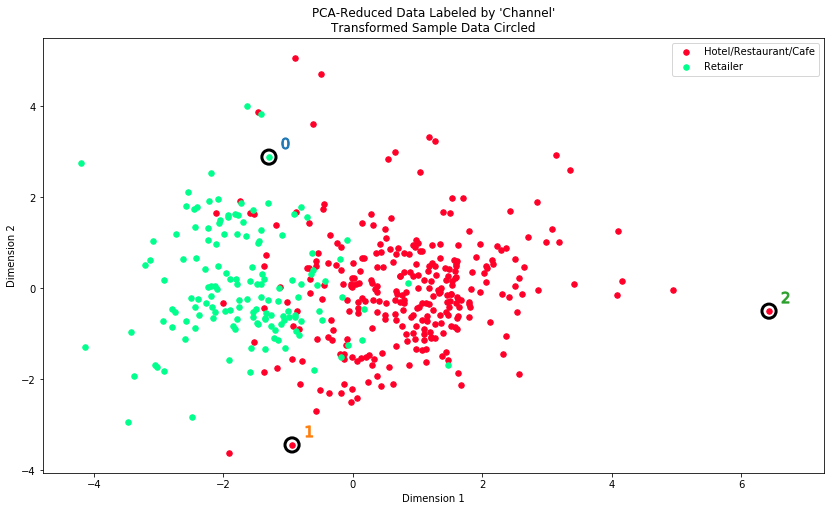

In [54]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The clsutering algorithm used, provided two clusters which is same as the number of labels for the data namely `HoReCa` and `Retailers`. The distribution obtained after clustering and the underlying distribution of `HoReCa` customers to `Retailer` customers are not identical but they are very similar. The `HoReCa` customers are very diverse and overlap with the `Retailer` customers on spending habits. Although there is an overlap, the two distributions are kind of similar and the clustering algorithm does a good job in classifying the data points in two categories and bringing out the basic distribution of data points in the categories which is very similar to the underlying distribution.

- The section to the right of the distribution can be termed as `Pure HoReCa` customers or to the to left of the distribution can be termed as `Pure Retailers`. But there is a big section in between in which the distribution of both type of customers overlap with one another. That section can not be termed as `Pure Retailers` or `Pure HoReCa` customers.

- The classifications are consistent with customer segment definitions. `Segment 0` was representing customers like Grocery Stores or retailers and here that distribution is represented as `Retailer Customers`. `Segment 1` represents customers like restaurants and cafe, here that distribution is represented as  `HoReCa` customers. So the definitions are consistent with the underlying classifications. There is a region of overlap between the two types of cutomers.Gaussian Mixture Model(GMM) was used for clustering the customers. For each data point GMM assign a probability value to it that reresents the probability of that data point lying in a cluster. Instead of just assigning a data point to a cluster,if its probability value is taken into consideration more information can be gained like information about a region of overlap where in my opinion the probability of lying in any one of the clsuter should not differ much.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.